In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import warnings

warnings.filterwarnings("ignore")

yf.pdr_override()

# Date range
start = '2014-01-01'
end = '2024-12-30'

# Tickers of assets
tickers = [
    'SPY',  # 미국 주식
    'IEV',  # 유럽 주식 
    'EWJ',  # 일본 주식
    # 'EEM',  # 이머징 주식
    'TLT',  # 미국 장기채
    'IEF',  # 미국 중기채
    'SHY',  # 미국 단기채
    'IYR',  # 미국 리츠
    'RWX',  # 글로벌 리츠
    'GLD',  # 금
    'DBC',  # 상품
    'INDA', # 인도 주식
]
exrate = ['USDKRW=X']
downloads = tickers + exrate
downloads.sort()

# Downloading the data
data = yf.download(downloads, start=start, end=end)

# Adjust Close 데이터 추출
data_adj_close = data.loc[:, ('Adj Close', slice(None))]
data_adj_close.columns = data_adj_close.columns.droplevel(0)

# 환율 데이터 추출
exrate_data = data_adj_close['USDKRW=X']

# 자산 가격 데이터를 원화로 변환
assets_krw = data_adj_close[tickers].multiply(exrate_data, axis=0)

# 일일 수익률 계산
assets = assets_krw.pct_change().dropna()


[*********************100%%**********************]  12 of 12 completed


In [7]:
Y = assets

# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format


# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)



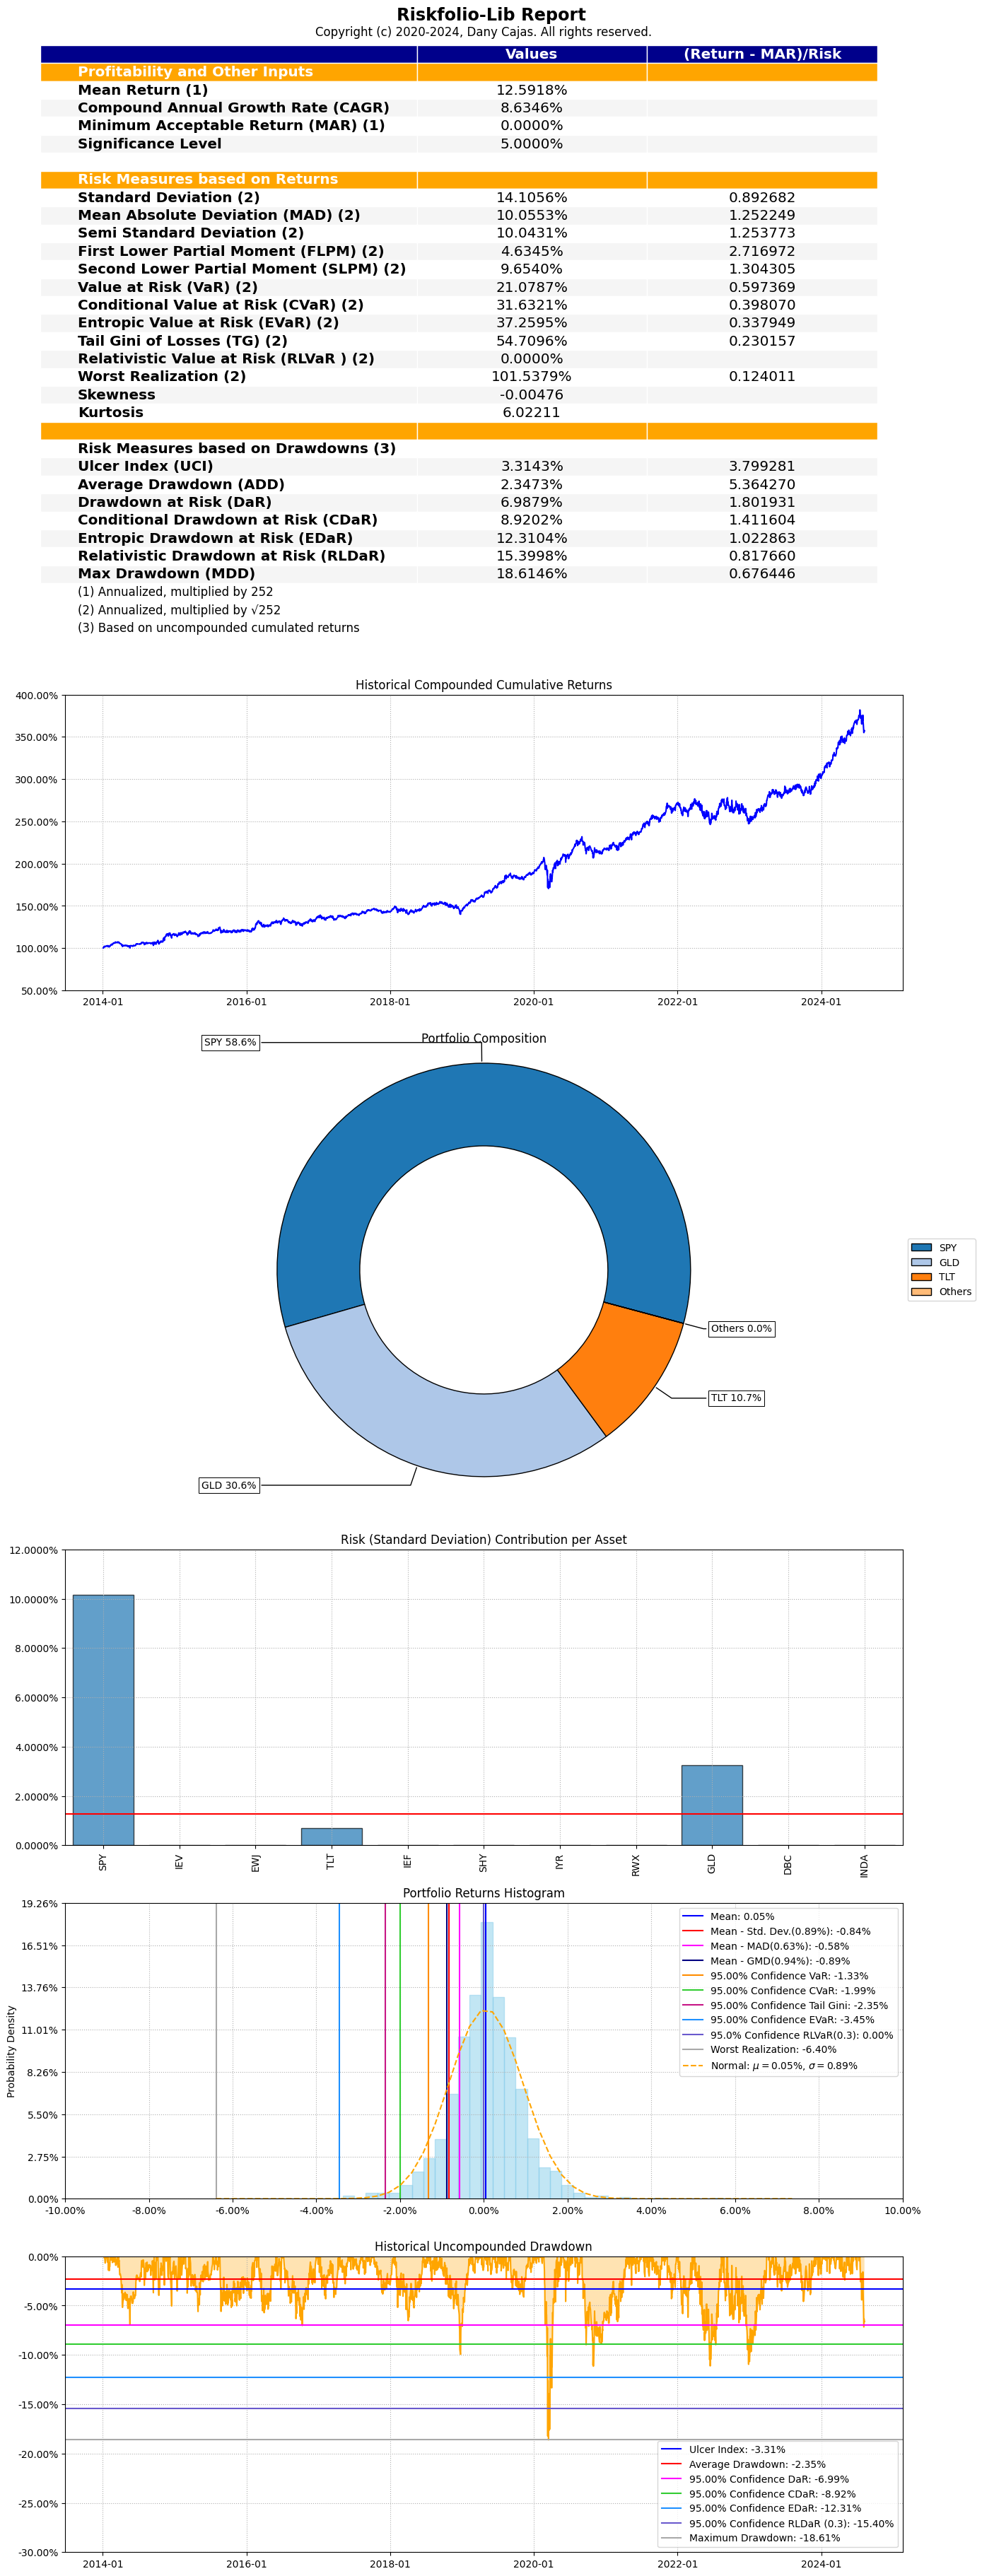

In [8]:

# Choose the risk measure
rm = 'MV'  # Standard Deviation
model = 'Classic'
obj = 'Sharpe'
# obj = 'MinRisk'
# obj = 'Utility'
rf = 0
b = None
hist = True
l = 0

# Estimate the portfolio that maximizes the risk adjusted return ratio
w = port.optimization(model=model, rm=rm, obj=obj, rf=0.0, l=0, hist=True)
# w = port.rp_optimization(model=model, rm='MV', rf=rf, b=b, hist=hist)
# w = port.rrp_optimization(model=model, version="C", l=1, b=None, hist=hist)

ax = rp.jupyter_report(returns=Y,
                       w=w,
                       rm=rm,
                       rf=0,
                       alpha=0.05,
                       height=6,
                       width=14,
                       others=0.05,
                       nrow=25)

,weights
SPY,14.5187%
IEV,5.6892%
EWJ,6.7581%
TLT,6.8031%
IEF,14.6341%
SHY,18.2538%
IYR,6.9492%
RWX,2.1275%
GLD,13.2745%
DBC,2.5849%


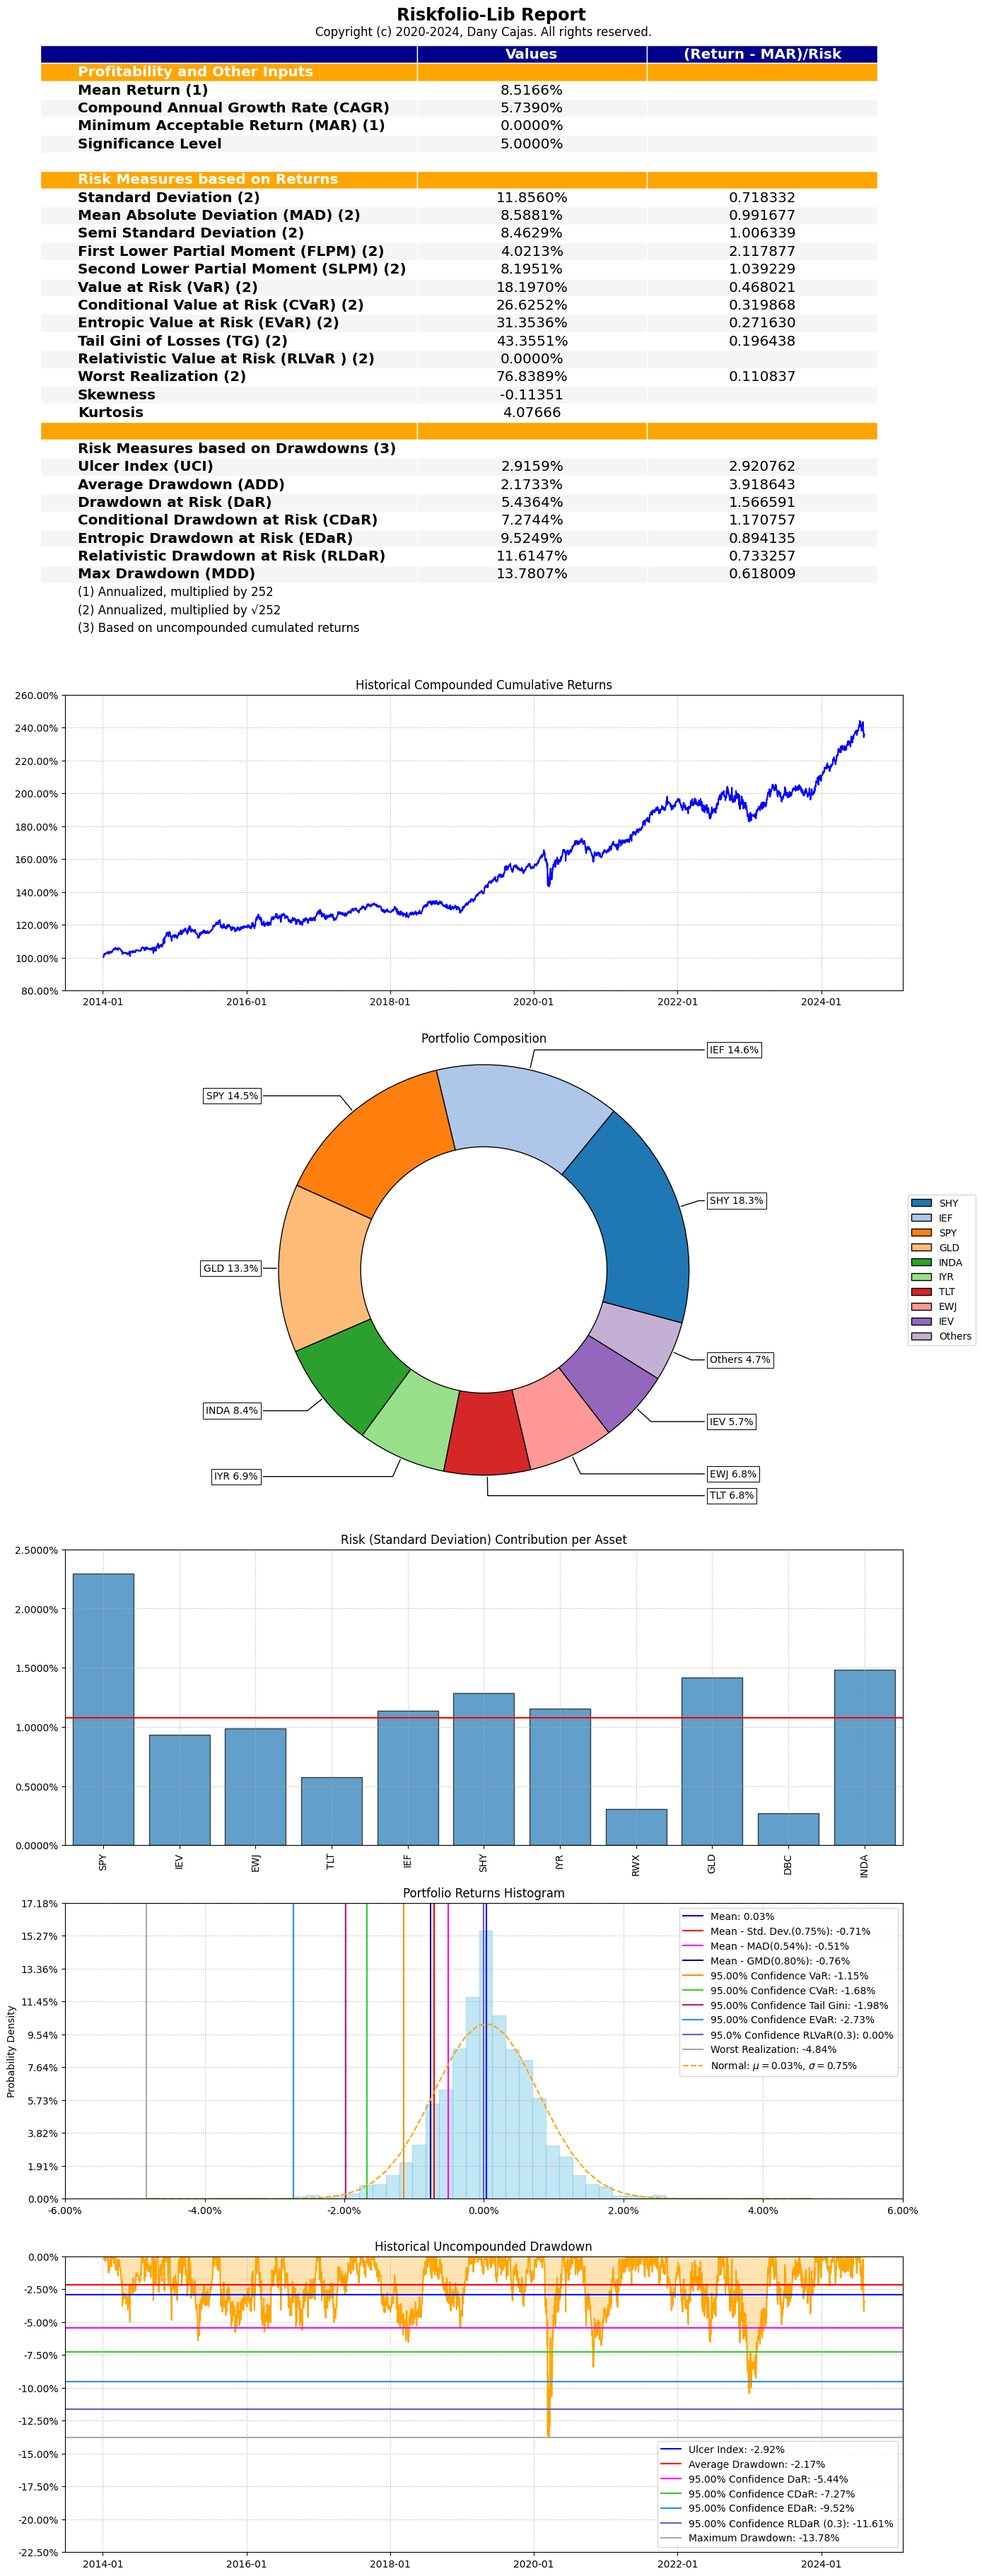

In [11]:
# Choose the risk measure
rm = 'MV'  # Standard Deviation
model = 'Classic'
obj = 'Sharpe'
# obj = 'MinRisk'
# obj = 'Utility'
rf = 0
b = None
hist = True
l = 0

box = 'm' # Method to estimate box uncertainty sets parameters
ellip = 'm' # Method to estimate elliptical uncertainty sets parameters
q = 0.05 # Confidence level for bootstrapping and k ellipsoidal uncertainty sets constraints
n_sim = 3000 # Number of scenarios for bootstrapping
window = 3 # Size of each block for block bootstrapping
dmu = 0.1 # delta to increase or decrease the mean vector
dcov = 0.1 # delta to increase or decrease the covariance matrix
seed = 0

port.wc_stats(box=box, ellip=ellip, q=q, n_sim=n_sim, window=window, dmu=dmu, dcov=dcov, seed=seed)

# Estimate worst case optimal portfolio using selected uncertainty sets:
port.solvers = ['MOSEK']

Umu = 'ellip' # Type of uncertainty set for mean vector
Ucov = 'ellip' # Type of uncertaity set for covariance matrix

w = port.wc_optimization(obj=obj, rf=rf, l=l, Umu=Umu, Ucov=Ucov)

display(w)

ax = rp.jupyter_report(returns=Y,
                       w=w,
                       rm=rm,
                       rf=0,
                       alpha=0.05,
                       height=6,
                       width=14,
                       others=0.05,
                       nrow=25)

In [5]:
box = 'd' # Method to estimate box uncertainty sets parameters
ellip = 's' # Method to estimate elliptical uncertainty sets parameters
q = 0.05 # Confidence level for bootstrapping and k ellipsoidal uncertainty sets constraints
n_sim = 3000 # Number of scenarios for bootstrapping
window = 3 # Size of each block for block bootstrapping
dmu = 0.1 # delta to increase or decrease the mean vector
dcov = 0.1 # delta to increase or decrease the covariance matrix
seed = 0

port.wc_stats(box=box, ellip=ellip, q=q, n_sim=n_sim, window=window, dmu=dmu, dcov=dcov, seed=seed)

# Estimate worst case optimal portfolio using selected uncertainty sets:

Umu = 'box' # Type of uncertainty set for mean vector
Ucov = 'box' # Type of uncertainty set for covariance matrix

w_wc_2 = port.wc_optimization(obj=obj, rf=rf, l=l, Umu=Umu, Ucov=Ucov)